In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv("AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.rename(columns={'#Passengers':'Passengers'},inplace=True)
#Since this is a time series, we need only second column.. So data now contains only passenger count...
data = data['Passengers']

In [5]:
type(data)

pandas.core.series.Series

In [6]:
data

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: Passengers, Length: 144, dtype: int64

In [7]:
data = np.array(data).reshape(-1,1)

In [8]:
type(data)

numpy.ndarray

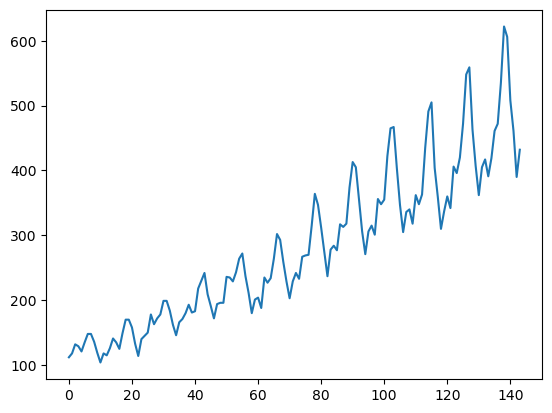

In [12]:
plt.plot(data)
plt.show()

In [13]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [14]:
len(data)

144

**Train, Test split**

In [15]:
train = data[0:100,:]
test = data[100:,:]

In [17]:
def get_data(data, steps):
    dataX = []
    dataY = []
    for i in range(len(data)-steps-1):
        a = data[i:(i+steps), 0]
        dataX.append(a)
        dataY.append(data[i+steps, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
steps = 2

In [19]:
x_train, y_train = get_data(train, steps)
x_test, y_test = get_data(test, steps)

In [20]:
#I'm reshaping my sets for using LSTM model..
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [21]:
model = Sequential()
model.add(LSTM(128, input_shape = (1, steps)))#This is my first hidden layer with 128 memory blocks 
model.add(Dense(64))                          #This is my second hidden layer 64 memory blocks
model.add(Dense(1))                           #This is my output layer
model.compile(loss = 'mean_squared_error', optimizer='adam')

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          67,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,393 (294.50 KB)

 Trainable params: 75,393 (294.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(x_train, y_train, epochs=25, batch_size=1)

Epoch 1/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0132
Epoch 2/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0036
Epoch 3/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0033
Epoch 4/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030
Epoch 5/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028
Epoch 6/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0031
Epoch 7/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0031
Epoch 8/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0027
Epoch 9/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0033
Epoch 10/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0026
Epoch 11/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0027
Epoch 12/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0025
Epoch 13/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0026
Epoch 14/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028
Epoch 15/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028
Epoch 16/25
97/97 ━

In [24]:
y_pred = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 466ms/step


In [25]:
y_pred = scaler.inverse_transform(y_pred)
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

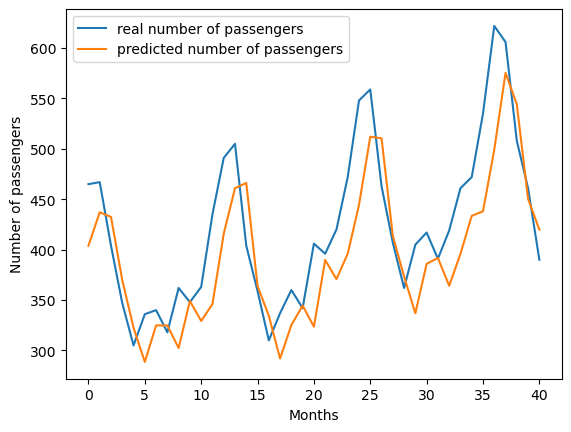

In [26]:
plt.plot(y_test, label='real number of passengers')
plt.plot(y_pred, label='predicted number of passengers')
plt.xlabel('Months')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()